<a href="https://colab.research.google.com/github/suvhradipghosh07/IMDB-Reviews-Classification/blob/master/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of IMDB Movie Reviews

## Context:

IMDB dataset having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms. For more dataset information, please go through the following link, http://ai.stanford.edu/~amaas/data/sentiment/

## Dataset:

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [3]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
token = {"username":"mr3suvhro","key":"dcb4135b5063ebca0a47fa658a6f518b"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [8]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [38]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import io
import zipfile

#extracting dataset from zip
dataset = "/content/{/content}/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/imdb-dataset-of-50k-movie-reviews.zip"
zip_ref = zipfile.ZipFile(dataset, "r")
zip_ref.extractall()
zip_ref.close()

In [41]:
import pandas as pd
import numpy as np

#importing dataset
df=pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Checking Dataset Description

In [42]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [56]:
#sentiment count
print("Total :\n",df['sentiment'].value_counts())

Total :
 negative    25000
positive    25000
Name: sentiment, dtype: int64


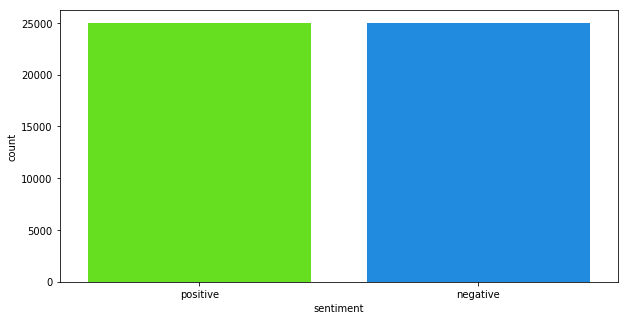

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(df['sentiment'], palette='gist_rainbow')

In [43]:
# importing all libraries
from sklearn.feature_extraction.text import CountVectorizer
#creating a sparse matrix using CountVectorizer
cn = CountVectorizer()
#now fitting the datadset to the class CV for creating Sparse matrix
sparse_matrix = cn.fit_transform(df['review'].values)
sparse_matrix

<50000x101895 sparse matrix of type '<class 'numpy.int64'>'
	with 6826529 stored elements in Compressed Sparse Row format>

In [44]:
#cheking shape 
sparse_matrix.get_shape()

(50000, 101895)

# Text Preprocessing

In [72]:
#Function to clean html tags from a sentence
import re
def clean_html(sentence): 
    pattern = re.compile('<.*?>')
    cleaned_text = re.sub(pattern,' ',sentence)
    return cleaned_text

print("Removing Html")
print('After Removing HTML tags:',clean_html('<a href="foo.com" class="bar">This is a demo test<b>text!</b></a><>'))
print("---------------------------------------------------")
print("---------------------------------------------------")
print('\n')

#Function to keep only words containing letters A-Z and a-z.
#this will remove all punctuations, special characters.
def rem_pun(sentence):
    cleaned_text  = re.sub('[^a-zA-Z]',' ',sentence)
    return (cleaned_text)

print("Removing Punctuations")
print("After Removing Punctuations:",rem_pun("fsd*?~,,,( sdfsdfdsvv)#"))
print("---------------------------------------------------")
print("---------------------------------------------------")
print("\n")

#Remove URL from sentences.
def rem_url(sen):
    txt = re.sub(r"http\S+", " ", sen)
    sen = re.sub(r"www.\S+", " ", txt)
    return (sen)

print("Removing URL")
print("After Removing URL:",rem_url("https://colab.research.google.com/drive/1dG8sy949kwnxsOX6BN4Dkime6JdVjGqL#scrollTo=_0_gNhnK6TRY notice the URL is removed"))
print("---------------------------------------------------")
print("---------------------------------------------------")
print("\n")

#Remove words like 'ddddddddd', 'funnnnnn', 'coolllllll' etc. Preserves words like 'goods', 'cool', 'best' etc. We will remove all such words which has three consecutive repeating characters.
def remove_extra(sen): 
    cleaned_text  = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',sen)
    return (cleaned_text)


print("Removing Extra")
print("After Removing Extra:",remove_extra("This looks soooooooo good!,I am so happpyyy"))
print("---------------------------------------------------")
print("---------------------------------------------------")
print("\n")

Removing Html
After Removing HTML tags:  This is a demo test text!   
---------------------------------------------------
---------------------------------------------------


Removing Punctuations
After Removing Punctuations: fsd        sdfsdfdsvv  
---------------------------------------------------
---------------------------------------------------


Removing URL
After Removing URL:   notice the URL is removed
---------------------------------------------------
---------------------------------------------------


Removing Extra
After Removing Extra: This looks  good!,I am so 
---------------------------------------------------
---------------------------------------------------




## Converting All words to lower case

In [0]:
#Convert all the words to lower case
#Source https://github.com/saugatapaul1010/Amazon-Fine-Food-Reviews-Analysis

def lower_case(x):
    x = str(x).lower()
    x = x.replace(",000,000", " m").replace(",000", " k").replace("′", "'").replace("’", "'")\
                           .replace("won't", " will not").replace("cannot", " can not").replace("can't", " can not")\
                           .replace("n't", " not").replace("what's", " what is").replace("it's", " it is")\
                           .replace("'ve", " have").replace("'m", " am").replace("'re", " are")\
                           .replace("he's", " he is").replace("she's", " she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("how's"," how has").replace("y'all"," you all")\
                           .replace("o'clock"," of the clock").replace("ne'er"," never").replace("let's"," let us")\
                           .replace("finna"," fixing to").replace("gonna"," going to").replace("gimme"," give me").replace("gotta"," got to").replace("'d"," would")\
                           .replace("daresn't"," dare not").replace("dasn't"," dare not").replace("e'er"," ever").replace("everyone's"," everyone is")\
                           .replace("'cause'"," because")
    
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    return x

# Stop words

Stop words usually refers to the most common words in a language are generally filtered out before or after processing of natural language data. Sometimes it is avoided to remove the stop words to support phrase search.

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')



#Stemming and stopwords removal
from nltk.stem.snowball import SnowballStemmer
snow = SnowballStemmer(language='english')


#Removing the word 'not' from stopwords
default_stopwords = set(stopwords.words('english'))
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = set(['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"])

stopword = default_stopwords - excluding

print(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'the', 'or', 'it', 'there', 'and', 'themselves', 'had', "you'll", 'that', 't', 'doing', 'any', 'should', 'this', 'having', 'at', 're', 'do', 'but', 'your', 'few', 'him', "you'd", 'his', 'he', 'if', 'between', 'what', 'been', 'those', 'these', 'to', 'down', 've', 'until', 'then', 'myself', 'o', 'under', 'when', "that'll", 'while', 'up', 'll', 'further', 'because', 'we', "you're", 'yourself', 'below', 'here', 'herself', 'of', 'through', 'i', 'over', 'each', 'd', 'how', 'so', 'our', "she's", 'by', 'very', 'only', 'himself', 'will', 'my', 'all', 'other', 'an', 'ourselves', 'after', 'before', 'am', "it's", 'out', 'about', 'they', 'from', 'y', 'where', 'her', 'a', 'm', 'some', 'on', 'for', 'no', 'who', 'which', 'ours', 'same', 'she', 'now', 'did', 'are', 'just', 'hers', 'shan', 'in', 'with', 'nor', 'more', 'its', 'be', 'both', 'most', "shan't", 'again', 'theirs', 'their', '

# Stemming Lemmatization

Stemming is definitely the simpler of the two approaches. With stemming, words are reduced to their word stems. A word stem need not be the same root as a dictionary-based morphological root, it just is an equal to or smaller form of the word. Stemming algorithms are typically rule-based.

Source : https://towardsdatascience.com/stemming-lemmatization-what-ba782b7c0bd8

In [115]:
from nltk.stem import SnowballStemmer
#initialising the snowball stemmer
snow = SnowballStemmer('english')
print("Before Stemming \n tastiest \n delicious \n tasty \n tasteful\n")
print('After Stemming')
print(snow.stem('tastiest'))
print(snow.stem('delicious'))
print(snow.stem('tasty'))
print(snow.stem('tasteful'))


Before Stemming 
 tastiest 
 delicious 
 tasty 
 tasteful

After Stemming
tastiest
delici
tasti
tast


In [0]:
#Stemming the text
def stemmer(sen):
    ps=nltk.porter.PorterStemmer()
    sen= ' '.join([ps.stem(word) for word in sen.split()])
    return sen
#Apply function on review column
df['review']=df['review'].apply(stemmer)

100%|██████████| 68355/68355 [00:00<00:00, 1085604.56it/s]


Text(0, 0.5, 'Number of Words')

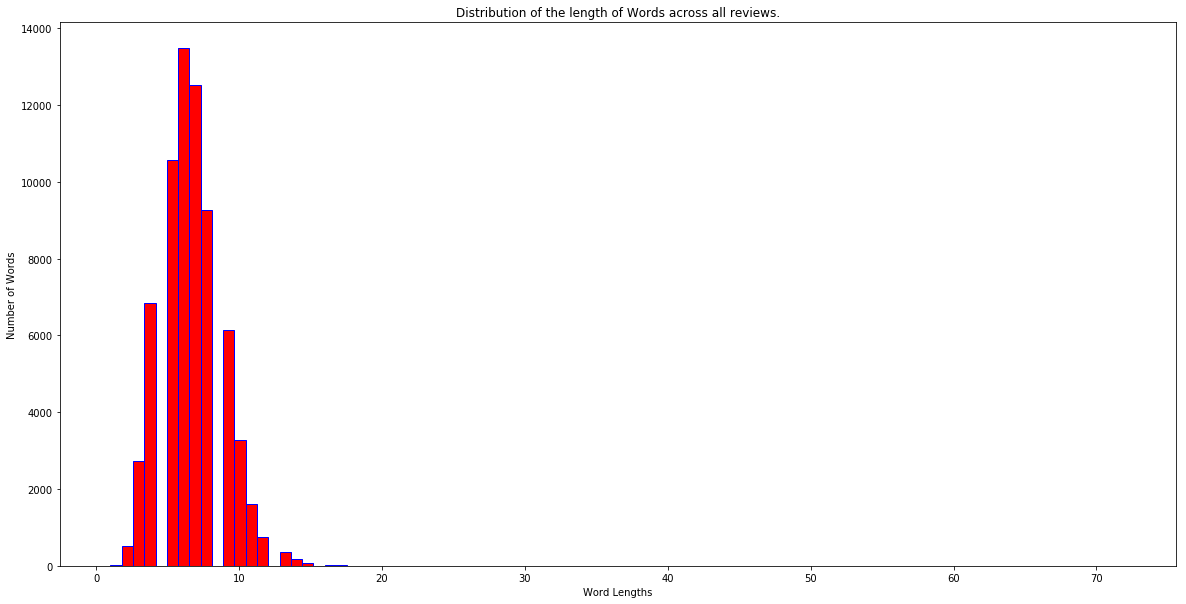

In [85]:
#Source https://github.com/saugatapaul1010/Amazon-Fine-Food-Reviews-Analysis
from tqdm import tqdm
total_words = []

for review in tqdm(df['review'].values):
    filtered_sentence=[]
    review = decon(review)
    review = clean_html(review)
    review = rem_url(review)
    review = rem_pun(review)
    review = remove_extra(review)
    
    for cleaned_words in review.split():   
        if((cleaned_words not in stopword)):          
            stemed_word=(sno.stem(cleaned_words.lower()))
            total_words.append(stemed_word)

total_words = list(set(total_words)) #Get list of unique words.

#A list to hold the length of each words used in all the reviews used across the whole dataset.
dist = []
for i in tqdm(total_words):
    length = len(i)
    dist.append(length)

# matplotlib histogram to see the distribution of the length of words
plt.figure(figsize=(20,10))
plt.hist(dist, color = 'red', edgecolor = 'blue', bins =90)
plt.title('Distribution of the length of Words across all reviews.')
plt.xlabel('Word Lengths')
plt.ylabel('Number of Words')

In [89]:
len(total_words)

68355

## Final Cleaning 

Here I'm applying whole data cleaning methods which I define in the top, now I'm putting those methods into the data frame for Final Cleaning.

1. Coverting all text into lower order
2. Cleaning all  html brackets like angular bracket '<>'
3. Cleaning all URL text
4. Removing all Punctuations
5. Removing all extra alphabets like 'gooddddd' or 'superbbbbb' etc.

In [0]:
#Cleaning the text from dataset
def cleaned_text(review):
    review = lower_case(review)
    review = clean_html(review)
    review = rem_url(review)
    review = rem_pun(review)
    review = remove_extra(review)
    return review
  
df['review']=df['review'].apply(cleaned_text)

In [97]:
# after cleaning
df['review'].head()

0    one of the other review ha mention that after ...
1    a wonder littl product the film techniqu is ve...
2    i thought thi wa a wonder way to spend time on...
3    basic there own a famili where a littl boy jak...
4    petter mattei own love in the time of money is...
Name: review, dtype: object

# Removing Stopwords

In [102]:
from nltk.tokenize.toktok import ToktokTokenizer
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')


#set stopwords to english
stopword=set(stopwords.words('english'))
print(stopword)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'the', 'or', 'it', 'there', 'and', 'themselves', 'had', "you'll", 'that', 't', 'doing', 'any', "isn't", 'should', 'this', 'isn', 'having', 'at', 're', 'do', "aren't", 'but', 'against', 'your', 'few', 'him', "you'd", 'his', 'he', 'if', 'between', 'hasn', 'what', 'mightn', 'been', 'those', 'aren', 'these', 'to', 'down', 've', 'until', 'then', "hadn't", 'myself', 'o', 'under', 'hadn', 'when', 'didn', "that'll", 'while', 'up', 'll', 'needn', 'further', "doesn't", 'because', 'couldn', "wouldn't", 'we', "you're", 'yourself', 'below', 'here', 'herself', 'of', 'through', "couldn't", 'i', 'over', 'each', 'ain', "wasn't", 'd', "didn't", 'how', 'so', 'our', "she's", 'by', 'very', 'don', 'only', 'himself', 'will', 'won', 'my', 'all', 'other', 'an', 'ourselves', 'after', 'before', 'am', "it's", 'shouldn', 'out', 'about', 'they', "mightn't", 'from', 'y', 'where', 'her', 'a', 'm', 'some', 'on', 'for', 'no', 'who', 'which', 'ours', 'same', 'she', "weren't", 'now', 'weren', 'did', 'are', 'just', 'must

# Word Cloud Visualization

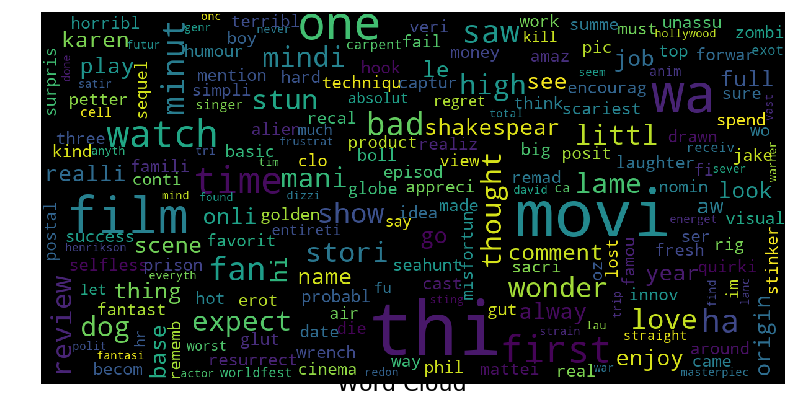

In [112]:
#source https://github.com/saugatapaul1010/Amazon-Fine-Food-Reviews-Analysis
from matplotlib.pyplot import *
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10 
plt.rcParams['savefig.dpi']=100             #72 
plt.rcParams['figure.subplot.bottom']=.1 


def wordcloud(data,title="Word Cloud"):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
wordcloud(df['review'])